In [2]:
%matplotlib inline

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import networkx as nx

## References
http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.0020095
https://people.ece.cornell.edu/atang/pub/15/PLOS_One.pdf

# Load Global network of 277 neurons (zip) dataset from [[kraiser et al. 2006]](http://www.biological-networks.org/pubs/suppl/Kaiser2006.html)

In [4]:
nodes_labels = pd.read_csv('celegans277labels.csv', header = None) # load the nodes labels from celegans277labels.csv
adjacency = pd.read_csv('celegans277matrix.csv', header = None)# load the adjacency matrix from celegans277matrix.csv
locations = pd.read_csv('celegans277positions.csv', header = None)# load the neurons locations from celegans277positions.csv
# change the adjacency matrix row names using "nodes_labels"
# change the adjacency matrix columns names using "nodes_labels" 
# change the locations row names using "nodes_labels"
# Compute the pairwise inter-neuron distances using the "pairwise_distances" function and set the proper names for rows and columns

In [5]:
locations.head()
adjacency.columns = nodes_labels[0]
adjacency.index = nodes_labels[0]
locations.index = nodes_labels[0]

In [6]:
# you should see this

In [7]:
adjacency.head()
locations.head()

,0,1
0,,
ADAL,0.011068,0.005903
ADAR,0.014206,0.002204
ADEL,0.016233,0.005657
ADER,0.014941,0.009308
ADFL,0.082393,-0.000984


In [8]:
# you should see this

In [9]:
dist = pd.DataFrame(pairwise_distances(locations)) # on veut la distance spatiale entre les neurons
dist.columns = nodes_labels[0]
dist.index = nodes_labels[0]
dist

,ADAL,ADAR,ADEL,ADER,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,...,VD12,VD13,VD2,VD3,VD4,VD5,VD6,VD7,VD8,VD9
0,,,,,,,,,,,,,,,,,,,,,
ADAL,0.000000,0.004850,0.005171,0.005157,0.071657,0.072781,0.074034,0.074281,0.075752,0.075708,...,0.879595,0.925826,0.045768,0.148903,0.233522,0.327535,0.418788,0.500684,0.608913,0.700111
ADAR,0.004850,0.000000,0.004004,0.007141,0.068261,0.069283,0.070109,0.070422,0.072290,0.072327,...,0.882789,0.928948,0.050171,0.152795,0.237204,0.331086,0.422265,0.504087,0.612279,0.703425
ADEL,0.005171,0.004004,0.000000,0.003873,0.066492,0.067626,0.068987,0.069209,0.070593,0.070543,...,0.884763,0.930989,0.050632,0.154001,0.238665,0.332695,0.423954,0.505854,0.614083,0.705282
ADER,0.005157,0.007141,0.003873,0.000000,0.068233,0.069470,0.071290,0.071439,0.072392,0.072258,...,0.883429,0.929726,0.048178,0.152003,0.236869,0.331023,0.422350,0.504321,0.612584,0.703832
ADFL,0.071657,0.068261,0.066492,0.068233,0.000000,0.002372,0.012054,0.010565,0.004296,0.004070,...,0.951023,0.997134,0.116032,0.220199,0.305094,0.399184,0.490444,0.572320,0.680529,0.771686
ADFR,0.072781,0.069283,0.067626,0.069470,0.002372,0.000000,0.009872,0.008328,0.003087,0.003873,...,0.951954,0.998025,0.117391,0.221471,0.306283,0.400311,0.491534,0.573370,0.681557,0.772686
ADLL,0.074034,0.070109,0.068987,0.071290,0.012054,0.009872,0.000000,0.001652,0.010969,0.012647,...,0.951580,0.997466,0.119468,0.222896,0.307235,0.400926,0.491947,0.573579,0.681654,0.772637
ADLR,0.074281,0.070422,0.069209,0.071439,0.010565,0.008328,0.001652,0.000000,0.009320,0.011003,...,0.952172,0.998087,0.119612,0.223176,0.307600,0.401352,0.492407,0.574075,0.682169,0.773176
AFDL,0.075752,0.072290,0.070593,0.072392,0.004296,0.003087,0.010969,0.009320,0.000000,0.001731,...,0.954993,1.001073,0.120251,0.224381,0.309233,0.403287,0.494524,0.576374,0.684569,0.775706


# Plot network

In [10]:
weigted_adj = dist*adjacency
weigted_adj

,ADAL,ADAR,ADEL,ADER,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,...,VD12,VD13,VD2,VD3,VD4,VD5,VD6,VD7,VD8,VD9
0,,,,,,,,,,,,,,,,,,,,,
ADAL,0.000000,0.0,0.005171,0.000000,0.071657,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ADAR,0.000000,0.0,0.000000,0.007141,0.000000,0.069283,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ADEL,0.000000,0.0,0.000000,0.003873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ADER,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ADFL,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ADFR,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ADLL,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ADLR,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
AFDL,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


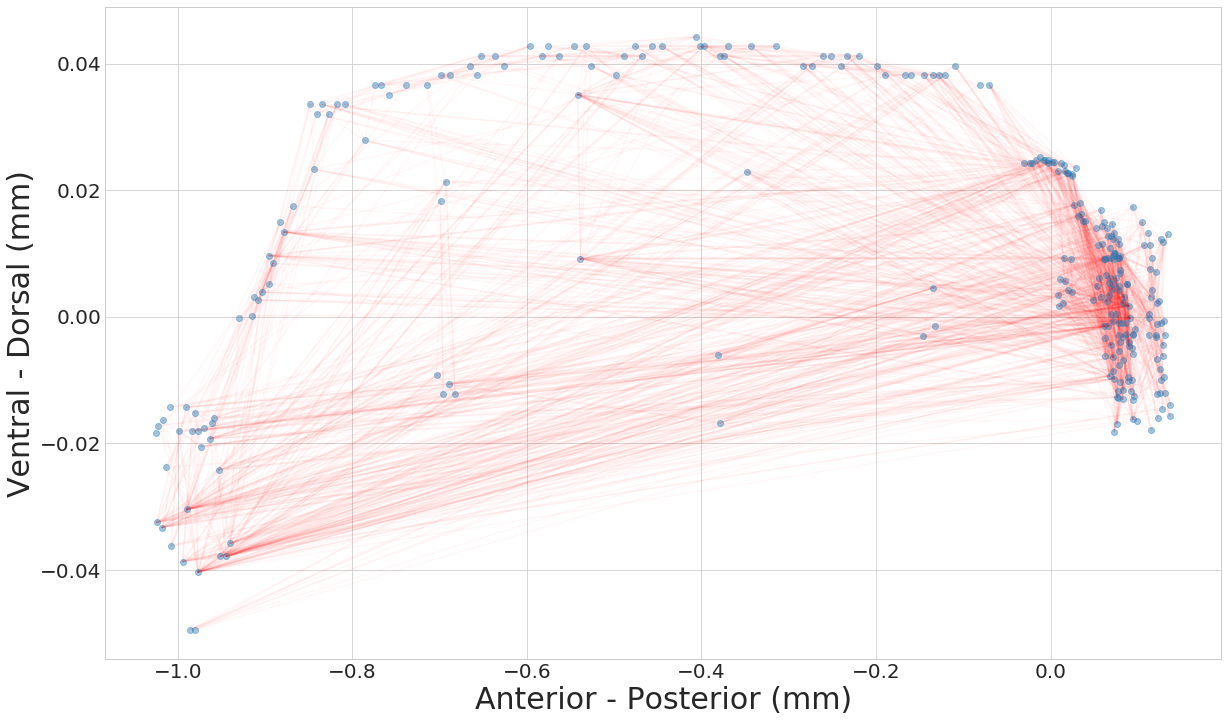

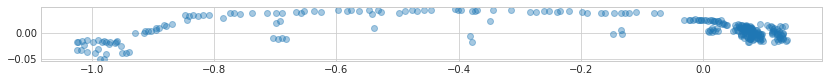

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,12))
for i,row in enumerate(adjacency.values):
    for j,columns in enumerate(row):
        if columns == 1:
            xs = [locations.values[i,0],locations.values[j,0]]
            ys = [locations.values[i,1],locations.values[j,1]]
            plt.plot(xs,ys,color="red",alpha=0.03)
plt.plot(locations.values[:,0],locations.values[:,1],"o",alpha=0.4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Anterior - Posterior (mm)",fontsize=30)
plt.ylabel("Ventral - Dorsal (mm)",fontsize=30)
plt.savefig("connectome.pdf")
plt.figure(figsize=(14,1))
plt.plot(locations.values[:,0],locations.values[:,1],"o",alpha=0.4)
plt.savefig("connectome_scale.pdf")

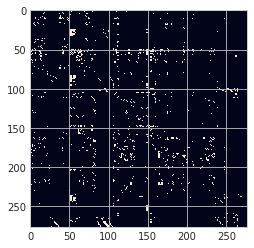

In [12]:
plt.imshow(adjacency)

In [13]:
adjacency
i = 0
for index, row in adjacency.iterrows() :
    for k in row:
        if row[k]==1 :
            i += 1
print(i/(277*277))


0.03185236351314366


In [15]:
in_degree = adjacency.sum(axis=0)

In [18]:
out_degree = adjacency.sum(axis=1)

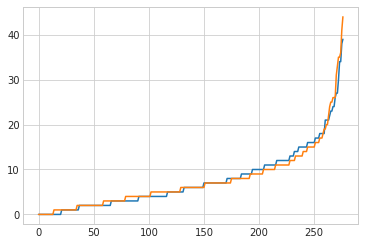

In [25]:
plt.plot(np.sort(in_degree))
plt.plot(np.sort(out_degree))

(array([102.,  90.,  48.,  18.,   5.,   7.,   0.,   4.,   1.,   2.]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ]),
 <a list of 10 Patch objects>)

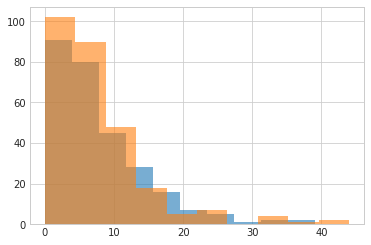

In [28]:
plt.hist(in_degree, alpha = 0.6) #orange
plt.hist(out_degree, alpha = 0.6) #orange

## Networkx

In [31]:
inter_neuron_dist = pd.DataFrame(pairwise_distances(adjacency)) # Compute the pairwise inter-neuron distances using the "pairwise_distances" function and set the proper names for rows and columns
inter_neuron_dist.columns = nodes_labels[0]
inter_neuron_dist.index = nodes_labels[0]

link_list=[]
for row in adjacency.index:
    for col in adjacency.columns:
        if adjacency.loc[row,col]!=0:
            link_list.append([row,col, inter_neuron_dist.loc[row,col]])
len(link_list)


2105

In [32]:
df = pd.DataFrame(link_list, columns=["input", "output", "weight"])

,input,output,weight
0,ADAL,ADEL,3.316625
1,ADAL,ADFL,3.000000
2,ADAL,AIAL,4.242641
3,ADAL,AWAL,2.449490
4,ADAL,PVPL,3.316625
5,ADAL,RMGL,3.316625
6,ADAR,ADER,3.605551
7,ADAR,ADFR,3.605551
8,ADAR,AIAR,4.000000
9,ADAR,ASHR,3.000000


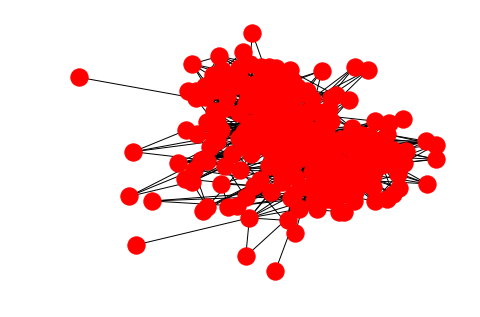

In [38]:
graph = nx.from_pandas_dataframe(df, 'input', 'output', 'weight')
nx.draw(graph)

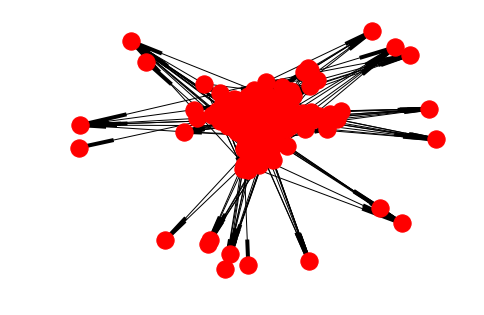

In [45]:
digraph = nx.from_pandas_dataframe(df, 'input', 'output', 'weight', create_using = nx.DiGraph())
nx.draw(digraph)

In [40]:
nx.nodes(graph)

NodeView(('ADAL', 'ADEL', 'ADFL', 'AIAL', 'AWAL', 'PVPL', 'RMGL', 'ADAR', 'ADER', 'ADFR', 'AIAR', 'ASHR', 'RICR', 'RIMR', 'RMGR', 'BDUL', 'BDUR', 'FLPL', 'IL2L', 'AVAR', 'AVM', 'FLPR', 'IL2R', 'AIZL', 'ASHL', 'AWBL', 'AIYR', 'ASEL', 'AVHL', 'AWAR', 'AWBR', 'PVPR', 'RIH', 'ADLL', 'AVAL', 'CEPVL', 'SDQR', 'ADLR', 'AVHR', 'AWCR', 'AFDL', 'AINR', 'ASER', 'AFDR', 'AINL', 'AIML', 'ASGL', 'ASKL', 'AWCL', 'HSNL', 'PVQL', 'AIMR', 'AIZR', 'ASGR', 'ASIR', 'ASKR', 'PVQR', 'AIBR', 'DVB', 'DVC', 'HSNR', 'RIBL', 'RMFR', 'SAADR', 'SDQL', 'VB1', 'AUAR', 'ASIL', 'DVA', 'RIGL', 'RIR', 'RIGR', 'ALA', 'ALML', 'RIFL', 'ALMR', 'ALNL', 'ALNR', 'AQR', 'PVCR', 'AS1', 'AVBL', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVL', 'DB1', 'PVCL', 'AS10', 'DB7', 'AS11', 'VA12', 'AS2', 'AS3', 'DB2', 'VD2', 'VD3', 'AS4', 'DB3', 'AS5', 'DB4', 'AS6', 'AS7', 'DB5', 'AS8', 'AS9', 'DB6', 'CEPVR', 'RIFR', 'ASJL', 'ASJR', 'AUAL', 'BAGR', 'IL2DL', 'URXL', 'URXR', 'AVG', 'AVJL', 'LUAL', 'LUAR', 'PHBL', 'PHBR', 'PHCL', 'PLMR', 'PQR', 

In [42]:
nx.edges(graph)

EdgeView([('ADAL', 'ADEL'), ('ADAL', 'ADFL'), ('ADAL', 'AIAL'), ('ADAL', 'AWAL'), ('ADAL', 'PVPL'), ('ADAL', 'RMGL'), ('ADAL', 'AIBR'), ('ADAL', 'AVAR'), ('ADAL', 'AVBL'), ('ADAL', 'AVBR'), ('ADAL', 'AVEL'), ('ADAL', 'AVJR'), ('ADAL', 'FLPR'), ('ADAL', 'RIML'), ('ADAL', 'RIPL'), ('ADEL', 'ADER'), ('ADEL', 'BDUL'), ('ADEL', 'BDUR'), ('ADEL', 'FLPL'), ('ADEL', 'IL2L'), ('ADEL', 'AVAL'), ('ADEL', 'AVAR'), ('ADEL', 'AVEL'), ('ADEL', 'CEPDL'), ('ADEL', 'IL1L'), ('ADEL', 'OLLL'), ('ADEL', 'RIAL'), ('ADEL', 'RIFL'), ('ADEL', 'RIGL'), ('ADEL', 'RIGR'), ('ADEL', 'RIH'), ('ADEL', 'RIVL'), ('ADEL', 'RIVR'), ('ADEL', 'RMDL'), ('ADEL', 'RMGL'), ('ADEL', 'RMHL'), ('ADEL', 'SIADR'), ('ADEL', 'SIBDR'), ('ADEL', 'SMBDR'), ('ADEL', 'URBL'), ('ADFL', 'AIZL'), ('ADFL', 'ASHL'), ('ADFL', 'AWBL'), ('ADFL', 'AUAL'), ('ADFL', 'OLQVL'), ('ADFL', 'RIAL'), ('ADFL', 'RIR'), ('ADFL', 'SMBVL'), ('AIAL', 'ADLL'), ('AIAL', 'AIML'), ('AIAL', 'AINR'), ('AIAL', 'AIZL'), ('AIAL', 'ASEL'), ('AIAL', 'ASER'), ('AIAL', 'ASGL

In [47]:
graph['AWAL']['AIZL']['weight'] 

3.3166247903554